In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats


importamos el dataset

In [3]:
df = pd.read_csv("owid-covid-data.csv")

In [4]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73379,ZWE,Africa,Zimbabwe,2021-03-03,36179.0,31.0,31.286,1478.0,6.0,3.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73380,ZWE,Africa,Zimbabwe,2021-03-04,36223.0,44.0,32.714,1483.0,5.0,3.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73381,ZWE,Africa,Zimbabwe,2021-03-05,36248.0,25.0,29.143,1484.0,1.0,3.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73382,ZWE,Africa,Zimbabwe,2021-03-06,36260.0,12.0,28.857,1485.0,1.0,3.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


Removemos registros que agrupen varios paises

In [5]:
mask_owid = ~(df["iso_code"].str.contains("OWID", case=False))
df = df[mask_owid]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69391 entries, 0 to 73383
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               69391 non-null  object 
 1   continent                              69391 non-null  object 
 2   location                               69391 non-null  object 
 3   date                                   69391 non-null  object 
 4   total_cases                            68347 non-null  float64
 5   new_cases                              68340 non-null  float64
 6   new_cases_smoothed                     67397 non-null  float64
 7   total_deaths                           59367 non-null  float64
 8   new_deaths                             59366 non-null  float64
 9   new_deaths_smoothed                    67397 non-null  float64
 10  total_cases_per_million                68347 non-null  float64
 11  ne

Rellenamos nulos con 0

In [6]:
df = df.fillna(value=0)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73379,ZWE,Africa,Zimbabwe,2021-03-03,36179.0,31.0,31.286,1478.0,6.0,3.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73380,ZWE,Africa,Zimbabwe,2021-03-04,36223.0,44.0,32.714,1483.0,5.0,3.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73381,ZWE,Africa,Zimbabwe,2021-03-05,36248.0,25.0,29.143,1484.0,1.0,3.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73382,ZWE,Africa,Zimbabwe,2021-03-06,36260.0,12.0,28.857,1485.0,1.0,3.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


Transformamos la columna date a formato series de tiempo

In [7]:
df["datetime"] = pd.to_datetime(df['date'])

In [8]:
df["datetime"].max()

Timestamp('2021-03-07 00:00:00')

In [9]:
mask_ultimo_dia = df["datetime"] == "2021-03-07"
df_ud = df[mask_ultimo_dia]
df_ud

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,datetime
377,AFG,Asia,Afghanistan,2021-03-07,55847.0,7.0,19.000,2449.0,0.0,0.857,...,0.0,597.029,9.59,0.0,0.0,37.746,0.50,64.83,0.511,2021-03-07
1143,ALB,Europe,Albania,2021-03-07,112897.0,819.0,818.571,1939.0,21.0,20.429,...,1.1,304.195,10.08,7.1,51.2,0.000,2.89,78.57,0.795,2021-03-07
1520,DZA,Africa,Algeria,2021-03-07,114234.0,130.0,163.143,3013.0,3.0,4.286,...,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,2021-03-07
1891,AND,Europe,Andorra,2021-03-07,11042.0,23.0,25.143,112.0,0.0,0.286,...,0.0,109.135,7.97,29.0,37.8,0.000,0.00,83.73,0.868,2021-03-07
2244,AGO,Africa,Angola,2021-03-07,21086.0,31.0,39.857,514.0,2.0,0.857,...,0.0,276.045,3.94,0.0,0.0,26.664,0.00,61.15,0.581,2021-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71522,VEN,South America,Venezuela,2021-03-07,142338.0,453.0,460.286,1384.0,6.0,5.714,...,0.0,204.850,6.47,0.0,0.0,0.000,0.80,72.06,0.711,2021-03-07
71932,VNM,Asia,Vietnam,2021-03-07,2512.0,11.0,9.143,35.0,0.0,0.000,...,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704,2021-03-07
72675,YEM,Asia,Yemen,2021-03-07,2473.0,29.0,26.857,651.0,1.0,2.429,...,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470,2021-03-07
73030,ZMB,Africa,Zambia,2021-03-07,82421.0,410.0,555.286,1124.0,8.0,4.714,...,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.584,2021-03-07


In [10]:
len(df["iso_code"].unique())

204

Dropeamos columnas que no vamos a usar

In [11]:
df_clust = df_ud.drop(['iso_code','continent','date','datetime', 'tests_units'], axis=1 )
df_clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 377 to 73383
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location                               191 non-null    object 
 1   total_cases                            191 non-null    float64
 2   new_cases                              191 non-null    float64
 3   new_cases_smoothed                     191 non-null    float64
 4   total_deaths                           191 non-null    float64
 5   new_deaths                             191 non-null    float64
 6   new_deaths_smoothed                    191 non-null    float64
 7   total_cases_per_million                191 non-null    float64
 8   new_cases_per_million                  191 non-null    float64
 9   new_cases_smoothed_per_million         191 non-null    float64
 10  total_deaths_per_million               191 non-null    float64
 11  ne

In [12]:
#sns.pairplot(df_clust,hue='location');

In [13]:
columnas = df_clust.columns

In [14]:
columnas = columnas.tolist

In [15]:
columnas

<bound method IndexOpsMixin.tolist of Index(['location', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'pe

In [16]:
df_clust2 = df_clust.drop([  'new_cases',
        'new_deaths',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 
       'people_vaccinated',  'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 
       'life_expectancy', 'human_development_index'], axis =1)

In [17]:
df_clust2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 377 to 73383
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   location                         191 non-null    object 
 1   total_cases                      191 non-null    float64
 2   new_cases_smoothed               191 non-null    float64
 3   total_deaths                     191 non-null    float64
 4   new_deaths_smoothed              191 non-null    float64
 5   total_cases_per_million          191 non-null    float64
 6   new_cases_per_million            191 non-null    float64
 7   new_cases_smoothed_per_million   191 non-null    float64
 8   total_deaths_per_million         191 non-null    float64
 9   new_deaths_per_million           191 non-null    float64
 10  new_deaths_smoothed_per_million  191 non-null    float64
 11  total_tests                      191 non-null    float64
 12  total_vaccinations

In [18]:
df_clust2 = df_clust2.drop(["location"], axis =  1)

In [19]:
df_clust2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 377 to 73383
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total_cases                      191 non-null    float64
 1   new_cases_smoothed               191 non-null    float64
 2   total_deaths                     191 non-null    float64
 3   new_deaths_smoothed              191 non-null    float64
 4   total_cases_per_million          191 non-null    float64
 5   new_cases_per_million            191 non-null    float64
 6   new_cases_smoothed_per_million   191 non-null    float64
 7   total_deaths_per_million         191 non-null    float64
 8   new_deaths_per_million           191 non-null    float64
 9   new_deaths_smoothed_per_million  191 non-null    float64
 10  total_tests                      191 non-null    float64
 11  total_vaccinations               191 non-null    float64
 12  people_fully_vacci

Implementamos un modelo Kmeans buscando una realacion entre GDP per capita y la cantidad de casos por millon.

In [20]:
from scipy import stats
df_clust3 = df_clust2[(np.abs(stats.zscore(df_clust2)) < 3).all(axis=1)]

In [21]:
df_clust4 = df_clust[['total_cases_per_million', 'total_deaths_per_million', 'weekly_hosp_admissions_per_million', 'total_tests_per_thousand', 'total_vaccinations_per_hundred','new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'gdp_per_capita', 'extreme_poverty' ]]

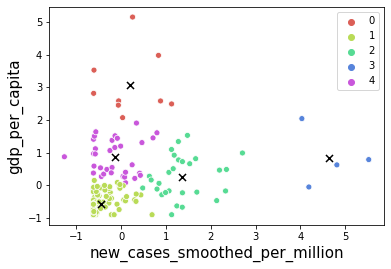

In [28]:
X=df_clust4[['new_cases_smoothed_per_million','gdp_per_capita', ]]

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X);

kmeans=KMeans(n_clusters=5,n_init=5, random_state=4) # Numero de repeticiones=10
kmeans.fit(X_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 5));
plt.xlabel('new_cases_smoothed_per_million',fontsize=15);plt.ylabel('gdp_per_capita',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

Evaluamos diferentes metricas para encontrar el numero optimo de clusters

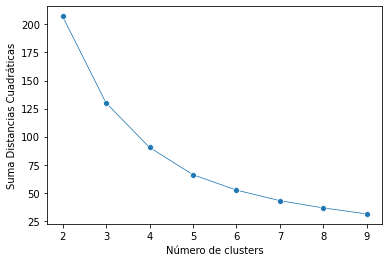

In [23]:
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');    

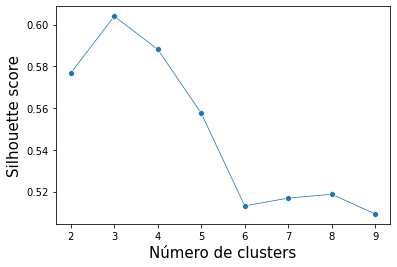

In [24]:
from sklearn.metrics import silhouette_score,silhouette_samples

sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_scaled)
    score=silhouette_score(X_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

For n_clusters = 2 The average silhouette_score is : 0.5767363130699706
For n_clusters = 3 The average silhouette_score is : 0.6039701940687398
For n_clusters = 4 The average silhouette_score is : 0.5881041482172564
For n_clusters = 5 The average silhouette_score is : 0.5615965245315094
For n_clusters = 6 The average silhouette_score is : 0.5394452106693062
For n_clusters = 7 The average silhouette_score is : 0.5253283556599566
For n_clusters = 8 The average silhouette_score is : 0.5186873850760513
For n_clusters = 9 The average silhouette_score is : 0.5132623377221254


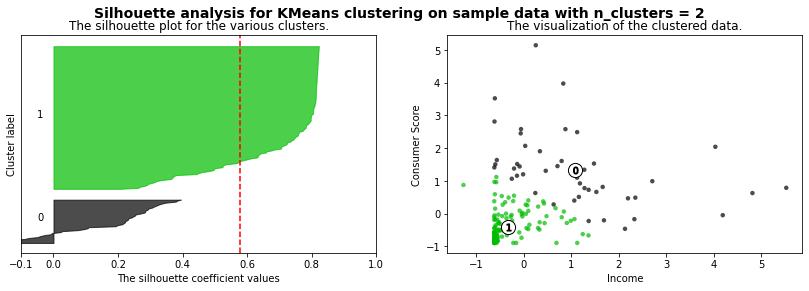

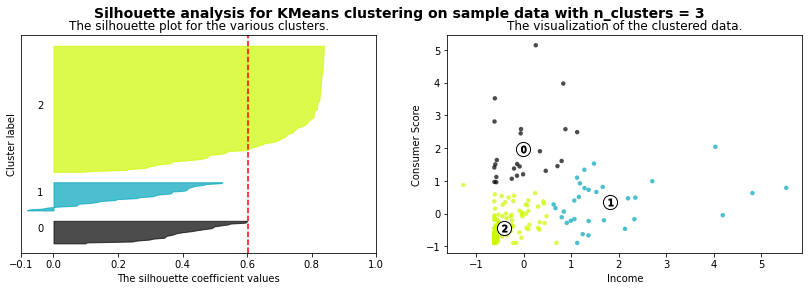

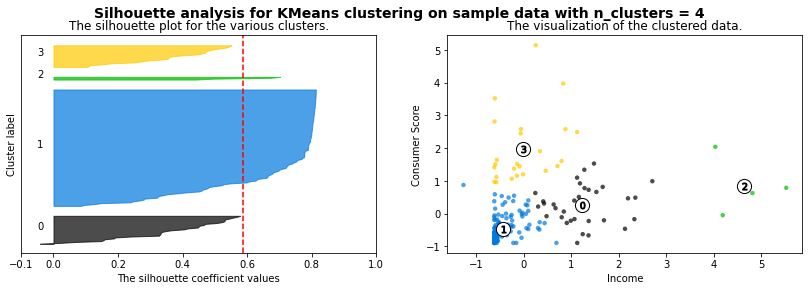

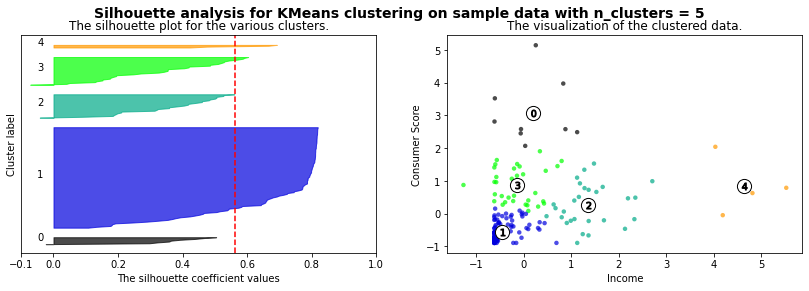

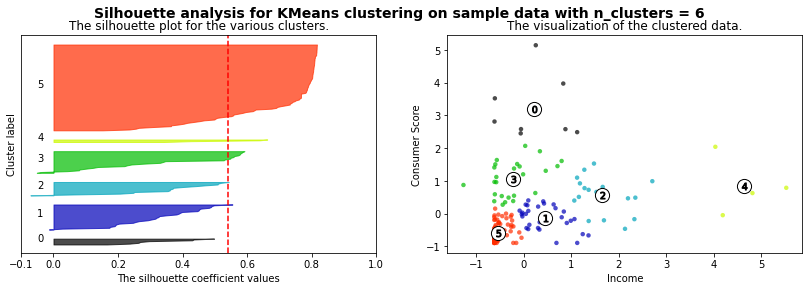

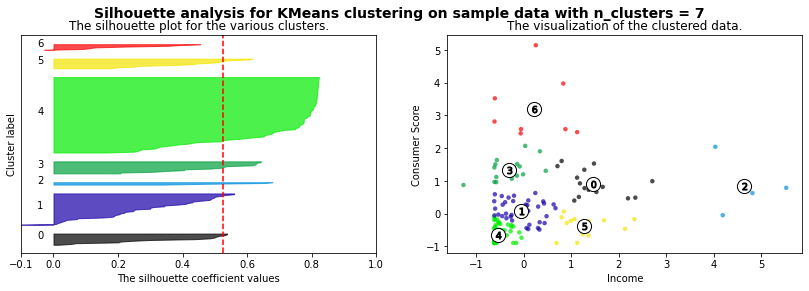

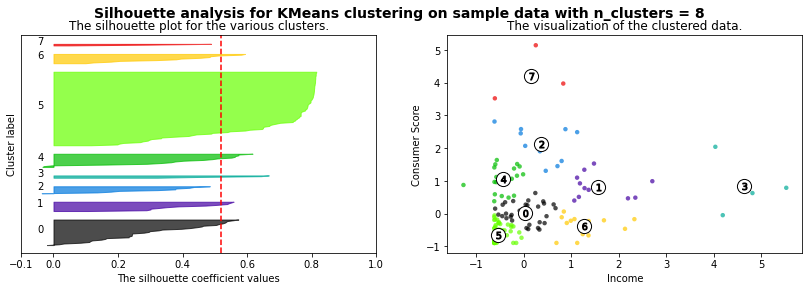

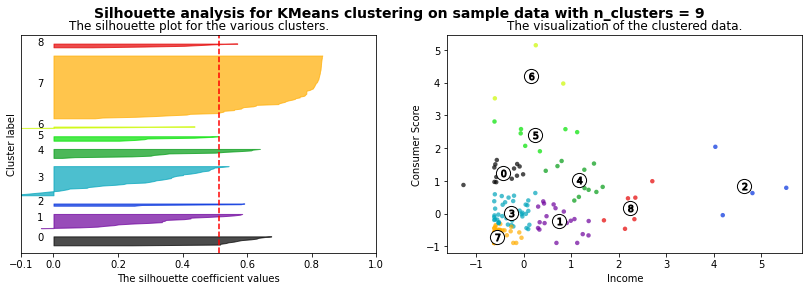

In [25]:
import matplotlib.cm as cm

for n_clusters in range(2,10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(14, 4)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=80, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Income")
    ax2.set_ylabel("Consumer Score")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

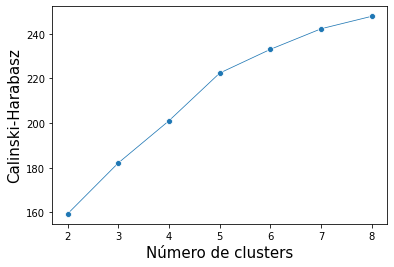

In [26]:
from sklearn.metrics import calinski_harabasz_score

k_values=range(2,9);
ch_scores=[]

for k in k_values:
    
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_scaled)
    score=calinski_harabasz_score(X_scaled,kmeans.labels_)
    ch_scores.append(score)

sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);
